Extract Dataset from zip file

In [1]:
import os
import zipfile
# Load Data
data_dir = 'ml-32m'

# Check if the dataset folder exists, if not, unzip the dataset
if not os.path.exists(data_dir):
    zip_file_path = 'ml-32m.zip'
    extract_dir = 'ml-32m'

    if not os.path.exists(extract_dir):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Extracted {zip_file_path} to {extract_dir}")
    else:
        print(f"Directory {extract_dir} already exists, skipping extraction.")

Extracted ml-32m.zip to ml-32m


Basic EDA Part

(32000204, 4)
(87585, 3)
(2000072, 4)
(87585, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usa

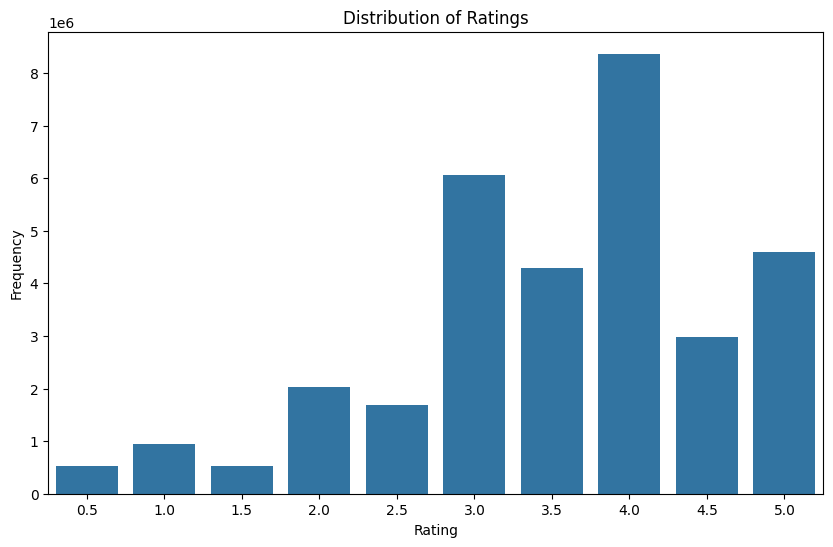

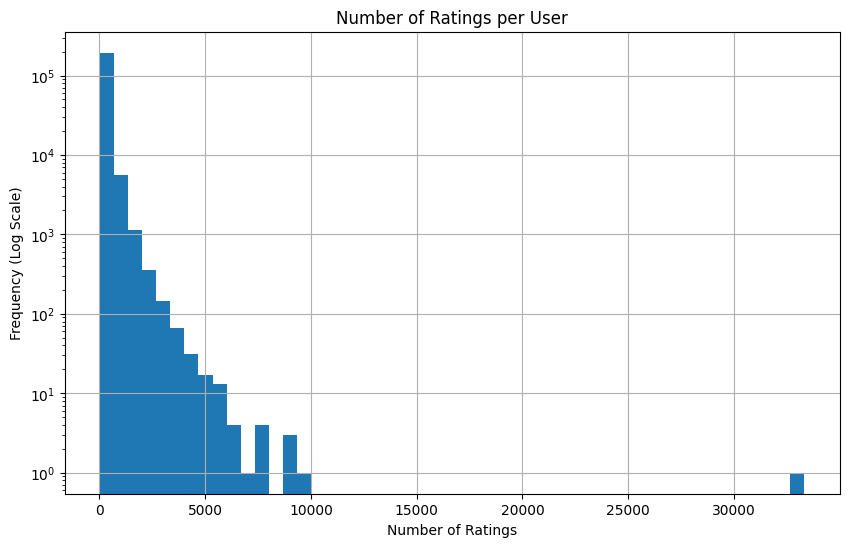

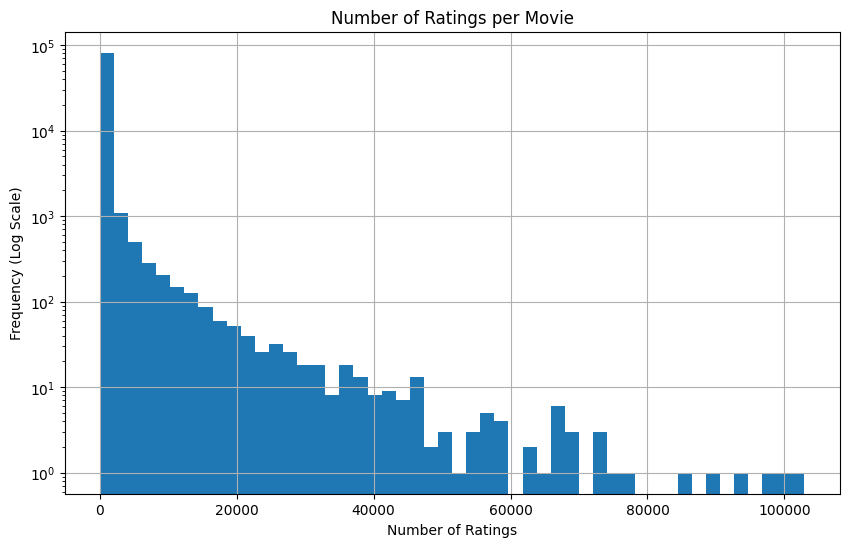

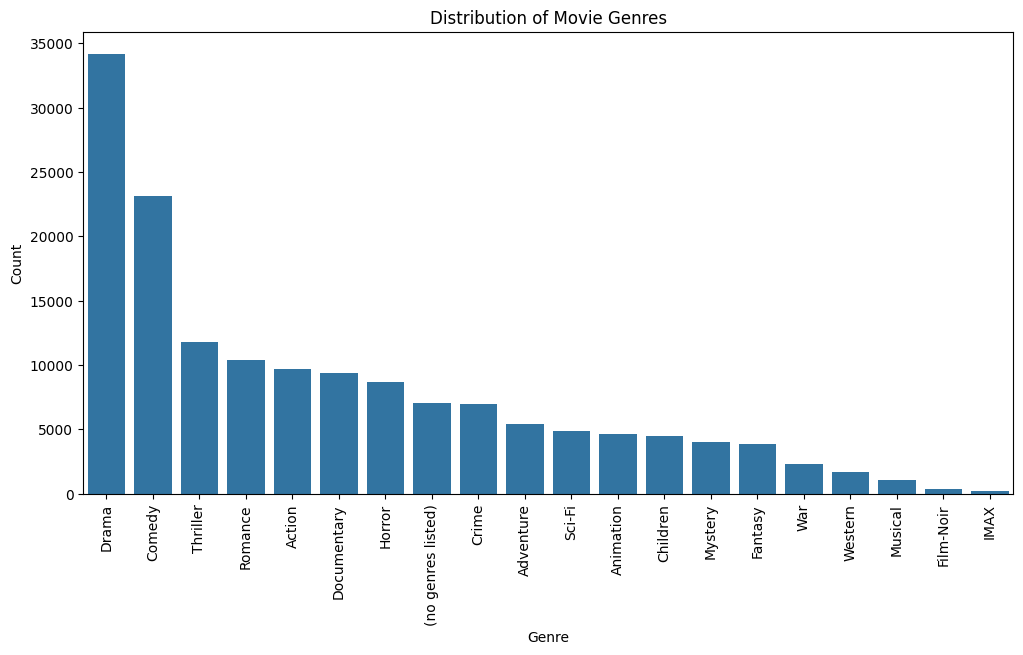

                                                  title  movieId
257           Star Wars: Episode IV - A New Hope (1977)      260
292                                 Pulp Fiction (1994)      296
314                    Shawshank Redemption, The (1994)      318
351                                 Forrest Gump (1994)      356
475                                Jurassic Park (1993)      480
522                             Schindler's List (1993)      527
585                    Silence of the Lambs, The (1991)      593
2480                                 Matrix, The (1999)     2571
2867                                  Fight Club (1999)     2959
4888  Lord of the Rings: The Fellowship of the Ring,...     4993
userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
10202      7748
198515     7594
49305      7488
22744      7372
7858       7322
dtype: int64


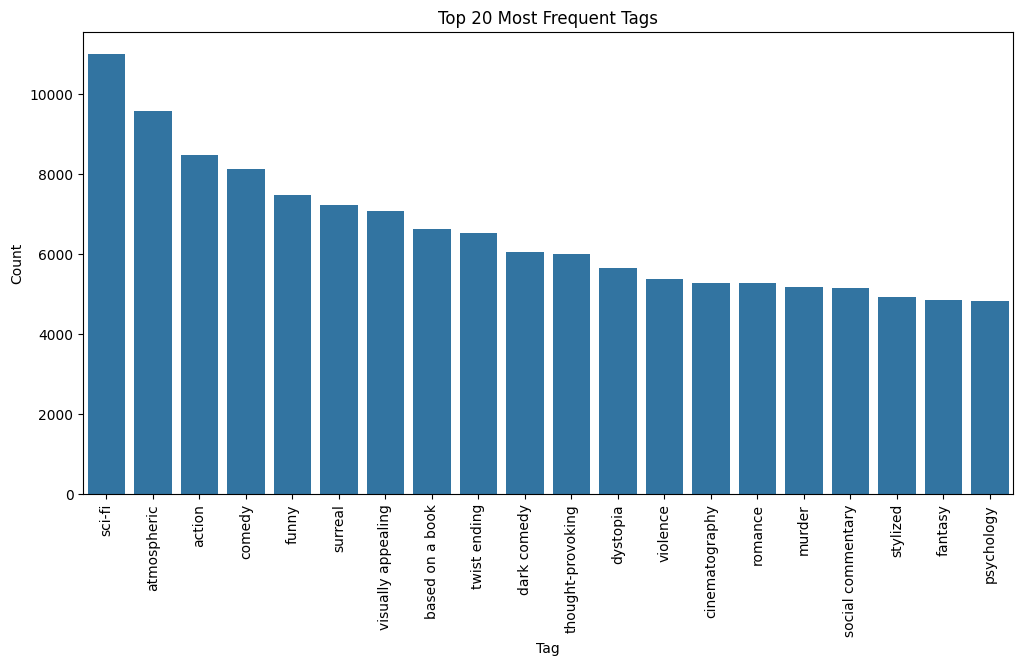

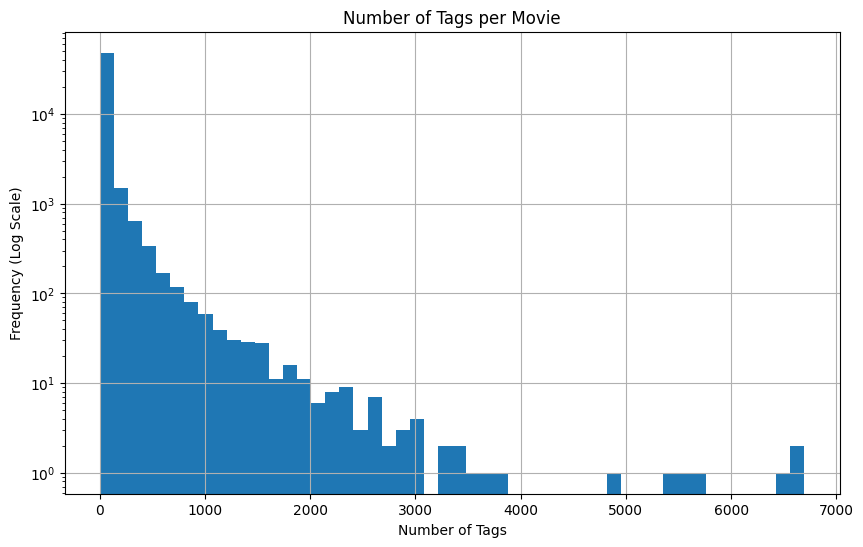

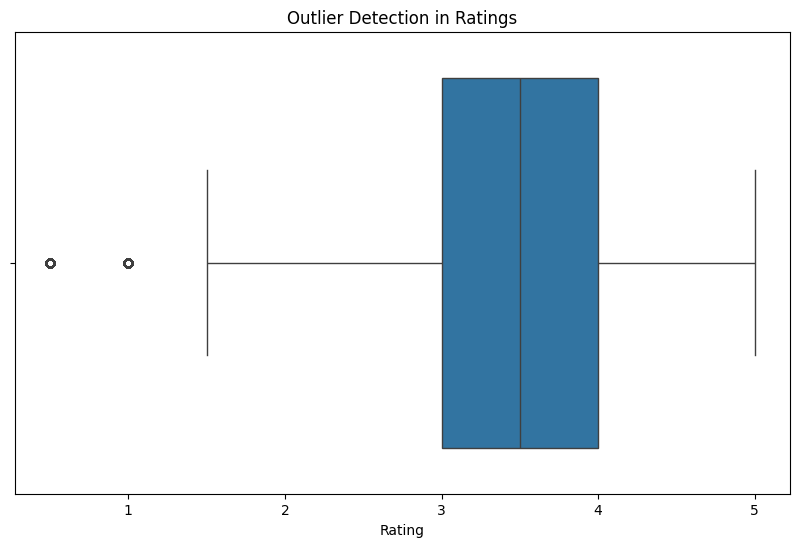

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Set the path to your dataset folder
dataset_path = '/content/ml-32m/ml-32m/'

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ratings = pd.read_csv(f'{dataset_path}ratings.csv')
movies = pd.read_csv(f'{dataset_path}movies.csv')
tags = pd.read_csv(f'{dataset_path}tags.csv')
links = pd.read_csv(f'{dataset_path}links.csv')

# Print dataset shapes
print(ratings.shape)
print(movies.shape)
print(tags.shape)
print(links.shape)

# Check dataset info
print(ratings.info())
print(movies.info())
print(tags.info())
print(links.info())

# Check the first few rows of each dataset
print(ratings.head())
print(movies.head())
print(tags.head())
print(links.head())

# Check for missing values
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(tags.isnull().sum())
print(links.isnull().sum())

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of ratings per user
user_ratings_count = ratings.groupby('userId').size()
plt.figure(figsize=(10, 6))
user_ratings_count.hist(bins=50)
plt.yscale('log')  # Apply log scale to y-axis
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Number of ratings per movie
movie_ratings_count = ratings.groupby('movieId').size()
plt.figure(figsize=(10, 6))
movie_ratings_count.hist(bins=50)
plt.yscale('log')  # Apply log scale to y-axis
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Distribution of movie genres
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Top 10 most rated movies
top_rated_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
top_movies = movies[movies['movieId'].isin(top_rated_movies.index)]
print(top_movies[['title', 'movieId']])

# Top 10 most active users
top_users = ratings.groupby('userId').size().sort_values(ascending=False).head(10)
print(top_users)

# Most frequent tags
tag_counts = tags['tag'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

# Number of tags per movie
tags_per_movie = tags.groupby('movieId').size()
plt.figure(figsize=(10, 6))
tags_per_movie.hist(bins=50)
plt.yscale('log')  # Apply log scale to y-axis
plt.title('Number of Tags per Movie')
plt.xlabel('Number of Tags')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Box plot to detect outliers in ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=ratings)
plt.title('Outlier Detection in Ratings')
plt.xlabel('Rating')
plt.show()


Model 1: Content-Based Filtering

*   List item
*   List item



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

dataset_path = '/content/ml-32m/ml-32m/'

# Load the datasets
ratings = pd.read_csv(f'{dataset_path}ratings.csv')
movies = pd.read_csv(f'{dataset_path}movies.csv')
tags = pd.read_csv(f'{dataset_path}tags.csv')
links = pd.read_csv(f'{dataset_path}links.csv')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Sample limit to avoid memory issues (Optional: remove for full dataset)
movies_sample = movies.head(1000)  # Limiting to first 1000 movies for testing

# Preprocessing: Clean and prepare the genres
movies_sample.loc[:, 'genres'] = movies_sample['genres'].fillna('')

# Use TF-IDF to vectorize genres (limit max_features for testing)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Limiting max features
tfidf_matrix = tfidf.fit_transform(movies_sample['genres'])

# Compute cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get content-based recommendations
def get_content_based_recommendations(movie_id, cosine_sim=cosine_sim, movies=movies_sample):
    idx = movies.index[movies['movieId'] == movie_id].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_movies = [movies['movieId'][i[0]] for i in sim_scores[1:11]]

    return top_movies

# Function to get movie titles based on movie IDs
def get_movie_titles(movie_ids, movies=movies_sample):
    return movies[movies['movieId'].isin(movie_ids)]['title'].tolist()

recommendations = get_content_based_recommendations(movie_id=1)

recommended_movie_titles = get_movie_titles(recommendations)
print(f"Recommended Movies: {recommended_movie_titles}")




Recommended Movies: ['Jumanji (1995)', 'Balto (1995)', 'Kids of the Round Table (1995)', 'Indian in the Cupboard, The (1995)', 'NeverEnding Story III, The (1994)', 'Pagemaster, The (1994)', 'All Dogs Go to Heaven 2 (1996)', 'James and the Giant Peach (1996)', 'Space Jam (1996)', 'Escape to Witch Mountain (1975)']


Model 2: Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset
dataset_path = '/content/ml-32m/ml-32m/'
ratings = pd.read_csv(f'{dataset_path}ratings.csv')
movies = pd.read_csv(f'{dataset_path}movies.csv')

# Sample limit to avoid memory issues (Optional: remove for full dataset)
ratings_sample = ratings.head(10000)

# Create the ratings matrix where rows are users and columns are movies (fill NaN values with 0)
movie_ratings_matrix = ratings_sample.pivot(index='userId', columns='movieId', values='rating').fillna(0)

movie_ratings_matrix_sparse = csr_matrix(movie_ratings_matrix)

cosine_sim = cosine_similarity(movie_ratings_matrix_sparse.T)

# Function to get collaborative recommendations based on cosine similarity
def get_collaborative_recommendations(movie_id, movie_ratings_matrix=movie_ratings_matrix, cosine_sim=cosine_sim):
    if movie_id not in movie_ratings_matrix.columns:
        raise ValueError(f"Movie ID {movie_id} not found in the ratings matrix.")

    idx = movie_ratings_matrix.columns.get_loc(movie_id)

    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar movies (excluding the original movie)
    top_movies = [movie_ratings_matrix.columns[i[0]] for i in sim_scores[1:11]]

    return top_movies

def get_movie_titles(movie_ids, movies=movies):
    return movies[movies['movieId'].isin(movie_ids)]['title'].tolist()

# Example: Get collaborative recommendations for a movie with ID 1
movie_id = 1
recommended_movie_ids = get_collaborative_recommendations(movie_id)
recommended_movie_titles = get_movie_titles(recommended_movie_ids)

# Print the recommended movie titles
print(f"Collaborative Recommendations for Movie ID {movie_id}: {recommended_movie_titles}")


Collaborative Recommendations for Movie ID 1: ['Star Wars: Episode IV - A New Hope (1977)', 'Pulp Fiction (1994)', 'Independence Day (a.k.a. ID4) (1996)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Fifth Element, The (1997)', 'Men in Black (a.k.a. MIB) (1997)', 'Saving Private Ryan (1998)', 'Matrix, The (1999)', 'Toy Story 2 (1999)']


Hybrid Model (Weighted Combination)

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets
dataset_path = '/content/ml-32m/ml-32m/'
ratings = pd.read_csv(f'{dataset_path}ratings.csv')
movies = pd.read_csv(f'{dataset_path}movies.csv')

# Sample limit to avoid memory issues
ratings_sample = ratings.head(10000)
movies_sample = movies.head(1000)

# Create the ratings matrix where rows are users and columns are movies (fill NaN values with 0)
movie_ratings_matrix = ratings_sample.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert the ratings matrix into a sparse matrix format to save memory
movie_ratings_matrix_sparse = csr_matrix(movie_ratings_matrix)

# Collaborative Filtering - Using cosine similarity
cosine_sim_cf = cosine_similarity(movie_ratings_matrix_sparse.T)

# Content-Based Filtering - Using movie genres (TF-IDF + Cosine Similarity)
movies_sample.loc[:, 'genres'] = movies_sample['genres'].fillna('')
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(movies_sample['genres'])
cosine_sim_cb = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get Collaborative recommendations based on cosine similarity
def get_collaborative_recommendations(movie_id, movie_ratings_matrix=movie_ratings_matrix, cosine_sim=cosine_sim_cf):
    if movie_id not in movie_ratings_matrix.columns:
        raise ValueError(f"Movie ID {movie_id} not found in the ratings matrix.")

    movie_idx = movie_ratings_matrix.columns.get_loc(movie_id)
    sim_scores = list(enumerate(cosine_sim[movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_movies = [movie_ratings_matrix.columns[i[0]] for i in sim_scores[1:11]]
    return top_movies

# Function to get Content-Based recommendations based on cosine similarity
def get_content_based_recommendations(movie_id, cosine_sim=cosine_sim_cb, movies=movies_sample):
    idx = movies.index[movies['movieId'] == movie_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_movies = [movies['movieId'][i[0]] for i in sim_scores[1:11]]
    return top_movies

# Hybrid Model: Combine both recommendations
def get_hybrid_recommendations(movie_id, weight_content=0.5, weight_collaborative=0.5):
    content_based_recommendations = get_content_based_recommendations(movie_id)
    collaborative_recommendations = get_collaborative_recommendations(movie_id)

    combined_recommendations = content_based_recommendations[:int(10 * weight_content)] + collaborative_recommendations[:int(10 * (1 - weight_content))]

    combined_recommendations = list(dict.fromkeys(combined_recommendations))
    return combined_recommendations[:10]

# Function to get movie titles based on movie IDs
def get_movie_titles(movie_ids, movies=movies_sample):
    return movies[movies['movieId'].isin(movie_ids)]['title'].tolist()

# Example: Get Hybrid Recommendations for a movie with ID 1
movie_id = 1
hybrid_recommendations = get_hybrid_recommendations(movie_id)
recommended_movie_titles = get_movie_titles(hybrid_recommendations)

# Print the recommended movie titles from the hybrid model
print(f"Hybrid Model Recommendations for Movie ID {movie_id}: {recommended_movie_titles}")


Hybrid Model Recommendations for Movie ID 1: ['Balto (1995)', 'Kids of the Round Table (1995)', 'Pagemaster, The (1994)', 'James and the Giant Peach (1996)', 'Space Jam (1996)', 'Independence Day (a.k.a. ID4) (1996)']


## compare the performance of Content-Based Filtering, Collaborative Filtering, and the Hybrid Model using precision, recall, F1-score, diversity, and novelty

Data Loaded: 993495 ratings, 20000 movies
    K                    Model  Precision    Recall  F1-Score  Diversity  \
0   5            Content-Based   0.020000  0.002478  0.004147   0.809559   
1   5  Collaborative Filtering   0.460000  0.069809  0.098731   0.856261   
2   5                   Hybrid   0.206667  0.038879  0.046409   0.836738   
3  10            Content-Based   0.013333  0.003063  0.004594   0.809520   
4  10  Collaborative Filtering   0.380000  0.100642  0.129288   0.849528   
5  10                   Hybrid   0.176667  0.057781  0.064262   0.828729   
6  15            Content-Based   0.011111  0.004915  0.006145   0.811496   
7  15  Collaborative Filtering   0.335556  0.131538  0.153861   0.846227   
8  15                   Hybrid   0.160000  0.073515  0.077182   0.828135   

    Novelty  
0  3.452879  
1  3.888202  
2  3.652187  
3  3.360556  
4  3.867448  
5  3.647459  
6       NaN  
7  3.863444  
8  3.640345  


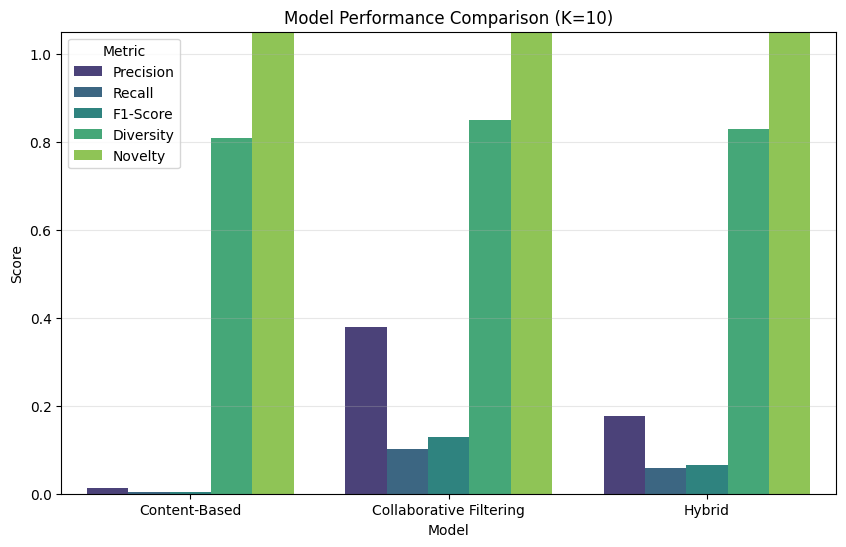

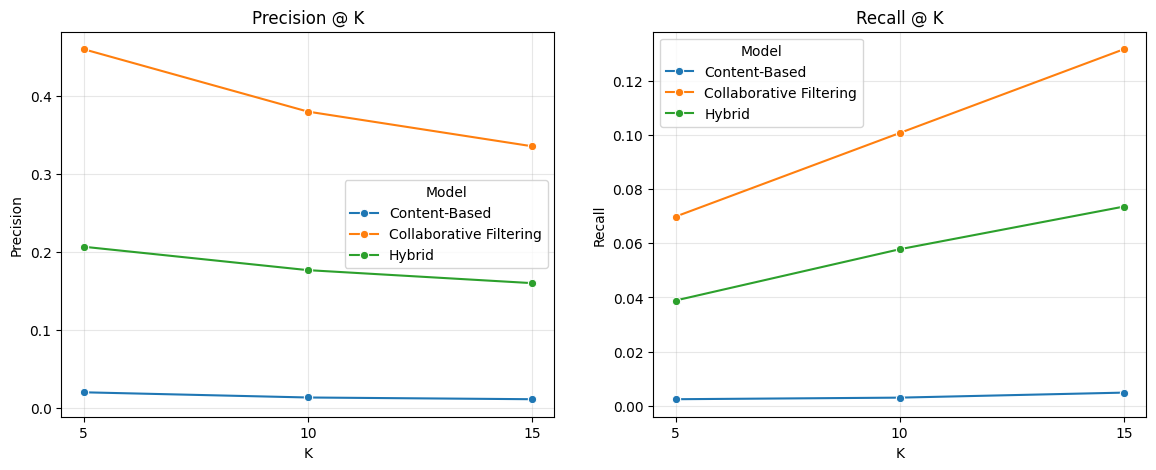

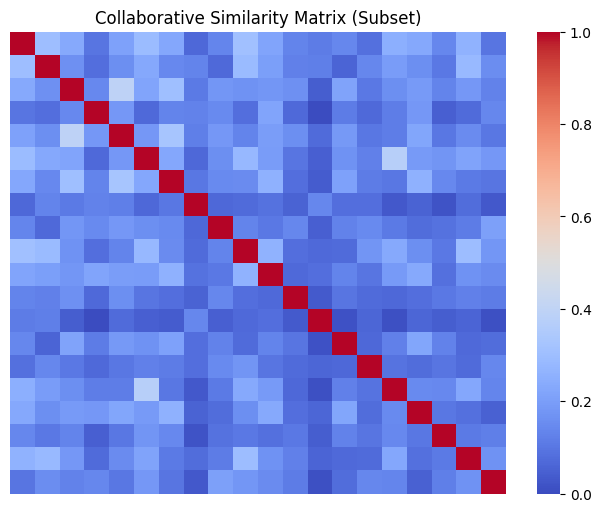

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

# --- 1. ROBUST DATA LOADING ---
def generate_mock_data(n_users=200, n_movies=500, n_ratings=10000):
    print("Generating mock data for demonstration...")
    movies = pd.DataFrame({
        'movieId': range(n_movies),
        'title': [f'Movie {i}' for i in range(n_movies)],
        'genres': np.random.choice(['Action|Adventure', 'Comedy|Romance', 'Sci-Fi|Drama', 'Horror'], n_movies)
    })

    ratings = pd.DataFrame({
        'userId': np.random.randint(0, n_users, n_ratings),
        'movieId': np.random.randint(0, n_movies, n_ratings),
        'rating': np.random.randint(3, 6, n_ratings).astype(np.float32)
    })
    # FIX: Ensure unique user-movie pairs
    ratings = ratings.drop_duplicates(subset=['userId', 'movieId'])
    return ratings, movies

def load_and_sample(path, n_users=20000, n_movies=20000):
    try:
        if not os.path.exists(f'{path}ratings.csv'):
            raise FileNotFoundError

        dtype_dict = {'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'}
        ratings = pd.read_csv(f'{path}ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype=dtype_dict, nrows=1000000)
        movies = pd.read_csv(f'{path}movies.csv', usecols=['movieId', 'title', 'genres'], dtype={'movieId': 'int32'})

        top_movies = ratings['movieId'].value_counts().head(n_movies).index
        ratings = ratings[ratings['movieId'].isin(top_movies)]
        top_users = ratings['userId'].value_counts().head(n_users).index
        ratings = ratings[ratings['userId'].isin(top_users)]
        movies = movies[movies['movieId'].isin(top_movies)]

        ratings = ratings.drop_duplicates(subset=['userId', 'movieId'])

        if len(ratings) < 100:
            raise ValueError("Data too sparse")

        return ratings, movies
    except (FileNotFoundError, ValueError) as e:
        print(f"Data load issue ({e}). Switching to mock data.")
        return generate_mock_data()

# Setup
dataset_path = '/content/ml-32m/ml-32m/'
ratings_sample, movies_sample = load_and_sample(dataset_path)
print(f"Data Loaded: {len(ratings_sample)} ratings, {len(movies_sample)} movies")

# --- 2. MODEL PREPARATION ---
train_data, test_data = train_test_split(ratings_sample, test_size=0.2, random_state=42)

# A. Content-Based Resources
movies_sample['genres'] = movies_sample['genres'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_sample['genres'])
content_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
movie_idx_map = {mid: i for i, mid in enumerate(movies_sample['movieId'])}
idx_movie_map = {i: mid for i, mid in enumerate(movies_sample['movieId'])}

# B. Collaborative Filtering Resources
user_movie_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_movie_sparse = csr_matrix(user_movie_matrix.values)
item_sim_cf = cosine_similarity(user_movie_sparse.T)
collab_idx_map = {i: mid for i, mid in enumerate(user_movie_matrix.columns)}

# --- 3. RECOMMENDATION LOGIC ---
def get_recommendations_logic(user_id, model_type, k):
    user_history = train_data[train_data['userId'] == user_id]['movieId'].tolist()

    if model_type == 'Content-Based':
        if not user_history: return []
        fav_rows = train_data[train_data['userId'] == user_id].sort_values('rating', ascending=False)
        if fav_rows.empty: return []
        fav_movie = fav_rows.iloc[0]['movieId']

        if fav_movie not in movie_idx_map: return []
        idx = movie_idx_map[fav_movie]
        sim_scores = list(enumerate(content_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        return [idx_movie_map[i[0]] for i in sim_scores if idx_movie_map[i[0]] not in user_history][:k]

    elif model_type == 'Collaborative Filtering':
        if user_id not in user_movie_matrix.index: return []
        user_idx = user_movie_matrix.index.get_loc(user_id)
        user_vec = user_movie_matrix.iloc[user_idx].values.reshape(1, -1)
        scores = user_vec.dot(item_sim_cf).flatten()
        top_indices = scores.argsort()[::-1]

        recs = []
        for idx in top_indices:
            mid = collab_idx_map[idx]
            if mid not in user_history:
                recs.append(mid)
                if len(recs) >= k: break
        return recs

    elif model_type == 'Hybrid':
        r1 = get_recommendations_logic(user_id, 'Content-Based', k*2)
        r2 = get_recommendations_logic(user_id, 'Collaborative Filtering', k*2)
        combined = list(set(r1 + r2))
        return combined[:k]

# --- 4. EVALUATION & PLOTTING ---
def evaluate_and_plot():
    k_values = [5, 10, 15]
    models = ['Content-Based', 'Collaborative Filtering', 'Hybrid']
    results = []

    test_users = test_data['userId'].unique()[:30]

    for k in k_values:
        for model in models:
            precisions = []
            recalls = []
            f1_scores = []
            diversities = []
            novelties = []
            for uid in test_users:
                truth = test_data[(test_data['userId'] == uid) & (test_data['rating'] >= 3.5)]['movieId'].tolist()
                if not truth: continue

                preds = get_recommendations_logic(uid, model, k)
                if not preds:
                    precisions.append(0)
                    recalls.append(0)
                    f1_scores.append(0)
                    diversities.append(0)
                    novelties.append(0)
                    continue

                hits = len(set(preds).intersection(set(truth)))
                precision = hits / k
                recall = hits / len(truth)
                f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

                precisions.append(precision)
                recalls.append(recall)
                f1_scores.append(f1_score)

                # Diversity calculation based on cosine similarity
                sim_matrix = content_sim[[movie_idx_map[movie] for movie in preds], :]
                diversity = 1 - np.mean(np.mean(sim_matrix, axis=0))  # Average dissimilarity
                diversities.append(diversity)

                # Novelty calculation (average popularity)
                novelty = np.mean([train_data[train_data['movieId'] == mid]['rating'].mean() for mid in preds])
                novelties.append(novelty)

            if precisions:
                results.append({
                    'K': k,
                    'Model': model,
                    'Precision': np.mean(precisions),
                    'Recall': np.mean(recalls),
                    'F1-Score': np.mean(f1_scores),
                    'Diversity': np.mean(diversities),
                    'Novelty': np.mean(novelties)
                })

    df_res = pd.DataFrame(results)

    if not df_res.empty:
        # 1. Bar Chart
        plt.figure(figsize=(10, 6))
        df_k10 = df_res[df_res['K'] == 10].melt(id_vars=['Model', 'K'], value_vars=['Precision', 'Recall', 'F1-Score', 'Diversity', 'Novelty'], var_name='Metric', value_name='Score')
        sns.barplot(data=df_k10, x='Model', y='Score', hue='Metric', palette='viridis')
        plt.title('Model Performance Comparison (K=10)')
        plt.ylim(0, 1.05)
        plt.grid(axis='y', alpha=0.3)
        plt.savefig('model_comparison_bar.png')

        # 2. Line Chart
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        sns.lineplot(data=df_res, x='K', y='Precision', hue='Model', marker='o')
        plt.title('Precision @ K')
        plt.xticks(k_values)
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        sns.lineplot(data=df_res, x='K', y='Recall', hue='Model', marker='o')
        plt.title('Recall @ K')
        plt.xticks(k_values)
        plt.grid(True, alpha=0.3)
        plt.savefig('performance_vs_k.png')

    # 3. Heatmap
    plt.figure(figsize=(8, 6))
    subset_sim = item_sim_cf[:20, :20]
    sns.heatmap(subset_sim, cmap='coolwarm', xticklabels=False, yticklabels=False)
    plt.title('Collaborative Similarity Matrix (Subset)')
    plt.savefig('similarity_heatmap.png')

    return df_res

metrics = evaluate_and_plot()
print(metrics)
